# Jakub Mazur
nie oceniać

In [79]:
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt

from statsmodels.stats.oneway import effectsize_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import FTestAnovaPower
import statsmodels.stats.api as sms

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from factor_analyzer import FactorAnalyzer

import numpy as np
import pingouin as pn

import statsmodels.api as sm
from statsmodels.formula.api import ols

from mvShapiroTest import test

from statsmodels.graphics.factorplots import interaction_plot

In [40]:
df = pd.read_csv('dane_zadanie_1.csv')
df

,ID,liczba sprzedanych produktów 2020,liczba sprzedanych produktów 2021,liczba sprzedanych produktów 2022,średnia prowizja 2020,średnia prowizja 2021,średnia prowizja 2022,kraj,płeć,sprzęt_komputerowy,oprogramowanie,wyposażenie_biura,organizacja_pracy,atmosfera,szkolenia,benefity,prowizje,płaca,zadowolenie
0,1,309,250,376,490,529,487,Francja,K,57.0,33.0,65.0,50.0,71.0,58.0,57.0,69.0,75.0,80
1,2,307,299,345,430,451,420,Niemcy,M,60.0,47.0,65.0,59.0,70.0,65.0,60.0,73.0,83.0,80
2,3,248,294,345,487,523,535,Niemcy,M,64.0,44.0,71.0,59.0,58.0,58.0,49.0,58.0,72.0,73
3,4,332,297,354,498,417,472,Francja,M,49.0,33.0,58.0,61.0,75.0,65.0,45.0,56.0,69.0,78
4,5,281,249,360,446,499,474,Francja,K,62.0,49.0,61.0,53.0,65.0,49.0,46.0,59.0,62.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,267,358,350,487,388,567,Francja,M,42.0,21.0,41.0,60.0,66.0,65.0,48.0,61.0,80.0,75
896,897,263,311,358,450,547,540,Niemcy,M,52.0,21.0,52.0,70.0,75.0,72.0,51.0,67.0,73.0,79
897,898,243,296,337,445,367,519,Francja,K,53.0,31.0,59.0,55.0,71.0,63.0,57.0,70.0,83.0,75
898,899,304,336,321,464,508,508,Hiszpania,M,45.0,27.0,47.0,46.0,78.0,51.0,46.0,54.0,65.0,72


In [41]:
lista_nazw_kolumn = df.columns.to_list()
lista_nazw_kolumn.remove('ID')
lista_nazw_kolumn.remove('kraj')
lista_nazw_kolumn.remove('płeć')

lista_nazw_kolumn.remove('liczba sprzedanych produktów 2020')
lista_nazw_kolumn.remove('liczba sprzedanych produktów 2021')
lista_nazw_kolumn.remove('liczba sprzedanych produktów 2022')

lista_nazw_kolumn.remove('średnia prowizja 2020')
lista_nazw_kolumn.remove('średnia prowizja 2021')
lista_nazw_kolumn.remove('średnia prowizja 2022')

lista_nazw_kolumn

['sprzęt_komputerowy',
 'oprogramowanie',
 'wyposażenie_biura',
 'organizacja_pracy',
 'atmosfera',
 'szkolenia',
 'benefity',
 'prowizje',
 'płaca',
 'zadowolenie']

In [42]:
df1 = pd.melt(df, value_vars=lista_nazw_kolumn)
df1 = df1.rename(columns={"variable": "group", "value": "score"})
df1.groupby('group')['score'].agg(['mean',  'median', 'std',  'skew', 'count']).round(2)

,mean,median,std,skew,count
group,,,,,
atmosfera,69.32,69.0,6.99,0.07,900
benefity,53.87,54.0,7.18,-0.01,900
oprogramowanie,34.54,34.0,8.21,0.11,900
organizacja_pracy,55.12,55.0,6.95,-0.03,900
prowizje,64.11,64.0,8.56,0.03,900
płaca,74.91,75.0,7.89,-0.02,900
sprzęt_komputerowy,53.59,53.5,7.41,-0.01,900
szkolenia,60.03,60.0,7.03,0.03,900
wyposażenie_biura,59.70,60.0,9.27,0.03,900


# Analiza czynnikowa




## 1. Normalność rozkładów
W pierwszej kolejności sprawdzamy normalność rozkładów.

**H0:** Rozkład jest normalny

**H1:** Rozkład nie jest normalny

Wszędzie gdzie pval < 0.05 odrzucamy H0 czyli rozkład nie jest normalny.

In [43]:
pg.normality(df1, group = 'group', dv = 'score')

,W,pval,normal
group,,,
sprzęt_komputerowy,0.996842,0.071871,True
oprogramowanie,0.996602,0.050213,True
wyposażenie_biura,0.997450,0.174793,True
organizacja_pracy,0.997022,0.093843,True
atmosfera,0.996879,0.075871,True
szkolenia,0.996628,0.052154,True
benefity,0.997098,0.104945,True
prowizje,0.996691,0.057315,True
płaca,0.997319,0.144916,True


Ze sprawdzenia wynika, że wszystkie rozkłady poza zadowoleniem mogą być normalne (nie odrzuciliśmy hipotezy zerowej).

## 2.Jednorodnoć wariancji

Hipotezy:

**H0:** Wariancje we wszystkich grupach są sobie równe.

**H1:** Wariancje dla conajmniej jednej pary wykonanych serii prób są różne: sigma_i =/= sigma_j

In [44]:
pg.homoscedasticity(df1, group='group', dv='score', method = 'bartlett')

,T,pval,equal_var
bartlett,348.226622,1.477696e-69,False


**ODP:** H0 jest odrzucone, rozkłady nie są takie same

## 3. Test sferyczności Barletta

Ma sprawdzić skorelowanie między zmiennymi

**H0:** Zmienne są ortogonalne (brak korelacji między zmiennymi).

**H1:** Zmienne nie są ortogonalne (istnieje korealacja między zmiennymi)

In [45]:
calculate_bartlett_sphericity(df[lista_nazw_kolumn])

(4400.868699695976, 0.0)

p_value, czyli druga zwrócona wartość, wyszła na poziomie 0.0

Dlatego można odrzucić H0. H1, mówiące o tym że zmienne NIE są ortogonalne, świadczy o tym że zmienne SĄ skorelowane. Dlatego można wykonać analizę czynnikową.

## 4. Test KMO

In [46]:
kmo_all, kmo_model = calculate_kmo(df[lista_nazw_kolumn])
print(kmo_model)

0.6612406152872972


kmo wynosi 0.66, jest większe od 0.5. Oznacza to że zmienne są częściowo skorelowane, można przeprowadzić analizę czynnikową

## Określenie ilości faktorów

In [47]:
fa = FactorAnalyzer()

fa.fit(df[lista_nazw_kolumn])

ev, v = fa.get_eigenvalues()
ev

array([2.70332086, 2.26295591, 1.86370765, 0.99745435, 0.78306855,
       0.53186012, 0.329759  , 0.22665604, 0.19560463, 0.10561288])

In [48]:
values = np.arange(1, len(ev)+1)
values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

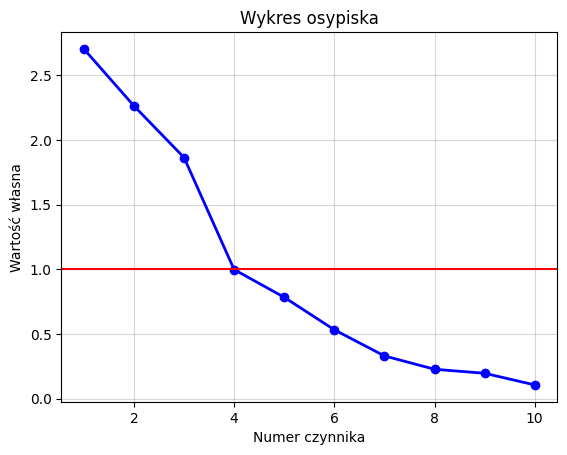

In [49]:
plt.plot(values, ev, 'o-', linewidth=2, color='blue')
plt.axhline(y = 1, color = 'r', label = 'axvline - full height')

plt.title('Wykres osypiska')
plt.xlabel('Numer czynnika')
plt.ylabel('Wartość własna')
plt.grid(alpha = 0.5)
plt.show()

Zgodnie z wykresem, wydaje się że 4 faktory będą optymalne

In [50]:
fa = FactorAnalyzer(4, rotation='varimax')
fa.fit(df[lista_nazw_kolumn])
print(fa.loadings_)

[[ 9.79866674e-01  2.00174202e-02  4.36668051e-03  2.35436400e-03]
 [ 8.67416082e-01 -7.07767102e-04 -1.09943234e-02 -3.15778422e-03]
 [ 8.91634463e-01 -6.05817657e-03  2.95795908e-03  1.74150906e-02]
 [ 7.62265690e-02  2.74915719e-02  7.13272205e-01  8.45353047e-02]
 [ 6.74314155e-03  1.87282517e-02  2.11866619e-01  9.74537817e-01]
 [ 7.05467430e-02  8.86634234e-03  8.43496705e-01  2.63460360e-01]
 [ 1.24859681e-02  7.19334298e-01 -6.49202635e-03 -2.85516331e-02]
 [ 2.47662032e-02  1.00500936e+00 -2.79212462e-02  8.54350873e-03]
 [-7.10502944e-03  6.72060160e-01 -1.43546711e-02  4.55695008e-02]
 [-4.31680174e-02 -1.57557278e-02  6.47812435e-02 -1.35601698e-02]]


In [51]:
lmatrix = pd.DataFrame(fa.loadings_, index = list(df[lista_nazw_kolumn].columns), columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4'])

# obliczenie wartości bezwzględnych

lmatrix = lmatrix.abs()
lmatrix

,Factor 1,Factor 2,Factor 3,Factor 4
sprzęt_komputerowy,0.979867,0.020017,0.004367,0.002354
oprogramowanie,0.867416,0.000708,0.010994,0.003158
wyposażenie_biura,0.891634,0.006058,0.002958,0.017415
organizacja_pracy,0.076227,0.027492,0.713272,0.084535
atmosfera,0.006743,0.018728,0.211867,0.974538
szkolenia,0.070547,0.008866,0.843497,0.263460
benefity,0.012486,0.719334,0.006492,0.028552
prowizje,0.024766,1.005009,0.027921,0.008544
płaca,0.007105,0.672060,0.014355,0.045570
zadowolenie,0.043168,0.015756,0.064781,0.013560


In [52]:
lmatrix.sort_values('Factor 1', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
sprzęt_komputerowy,0.979867,0.020017,0.004367,0.002354
wyposażenie_biura,0.891634,0.006058,0.002958,0.017415
oprogramowanie,0.867416,0.000708,0.010994,0.003158
organizacja_pracy,0.076227,0.027492,0.713272,0.084535
szkolenia,0.070547,0.008866,0.843497,0.263460
zadowolenie,0.043168,0.015756,0.064781,0.013560
prowizje,0.024766,1.005009,0.027921,0.008544
benefity,0.012486,0.719334,0.006492,0.028552
płaca,0.007105,0.672060,0.014355,0.045570
atmosfera,0.006743,0.018728,0.211867,0.974538


Widać, że na Factor 1 olbrzymi wpływ mają:
* sprzęt_komputerowy
* wyposażenie_biura
* oprogramowanie

Można by powiedizeć że jest to factor związany ze stanowiskiem/ergonomią pracy

In [53]:
lmatrix.sort_values('Factor 2', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
prowizje,0.024766,1.005009,0.027921,0.008544
benefity,0.012486,0.719334,0.006492,0.028552
płaca,0.007105,0.672060,0.014355,0.045570
organizacja_pracy,0.076227,0.027492,0.713272,0.084535
sprzęt_komputerowy,0.979867,0.020017,0.004367,0.002354
atmosfera,0.006743,0.018728,0.211867,0.974538
zadowolenie,0.043168,0.015756,0.064781,0.013560
szkolenia,0.070547,0.008866,0.843497,0.263460
wyposażenie_biura,0.891634,0.006058,0.002958,0.017415
oprogramowanie,0.867416,0.000708,0.010994,0.003158


Widać, że na Factor 2 olbrzymi wpływ mają:
* prowizje
* benefity
* płaca

Można by powiedizeć że jest to factor związany z bezpośrednimi i pośrednimi wpływami na konto pracownika

In [54]:
lmatrix.sort_values('Factor 3', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
szkolenia,0.070547,0.008866,0.843497,0.263460
organizacja_pracy,0.076227,0.027492,0.713272,0.084535
atmosfera,0.006743,0.018728,0.211867,0.974538
zadowolenie,0.043168,0.015756,0.064781,0.013560
prowizje,0.024766,1.005009,0.027921,0.008544
płaca,0.007105,0.672060,0.014355,0.045570
oprogramowanie,0.867416,0.000708,0.010994,0.003158
benefity,0.012486,0.719334,0.006492,0.028552
sprzęt_komputerowy,0.979867,0.020017,0.004367,0.002354
wyposażenie_biura,0.891634,0.006058,0.002958,0.017415


Widać, że na facotr 3 olbrzymi wpływ mają:
* szkolenia
* organizacja pracy

Czyli można by pwoiedzieć że jest to factor związany z rozwojem pracowanika

In [55]:
lmatrix.sort_values('Factor 4', ascending=False)

,Factor 1,Factor 2,Factor 3,Factor 4
atmosfera,0.006743,0.018728,0.211867,0.974538
szkolenia,0.070547,0.008866,0.843497,0.263460
organizacja_pracy,0.076227,0.027492,0.713272,0.084535
płaca,0.007105,0.672060,0.014355,0.045570
benefity,0.012486,0.719334,0.006492,0.028552
wyposażenie_biura,0.891634,0.006058,0.002958,0.017415
zadowolenie,0.043168,0.015756,0.064781,0.013560
prowizje,0.024766,1.005009,0.027921,0.008544
oprogramowanie,0.867416,0.000708,0.010994,0.003158
sprzęt_komputerowy,0.979867,0.020017,0.004367,0.002354


do ostatniego factora załapała się tylko atmosfera.

# Test Welcha
Dla danych wykorzystanych w Analizie Czynnikowej:
Ponieważ założenie o normalności rozkładów jest spełnione (poza zadowoleniem), a założenie o jednorodności wariancji nie jest, nie możemy zrobić testu Anovy, możemy natomiast zrobić test Welcha

**H0:** średnie są sobie równe (ale wariancje już niekoniecznie)

**H1:** conajmniej jedna średnia jest różna od pozostałych

In [56]:
pg.welch_anova(dv='score', between='group', data=df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,9,3657.797382,2715.4244,0.0,0.708088


Ponieważ p wynosi 0, wiadomo że któraś ze średnich różni się od pozostałych.

## Analiza post-hoc
### Test tukeya

**H0**: elementy mają taką samą średnią

**H1**: średnia elementów się różni

Czyli dla elementów gdzie p>0.5, kolumna reject będzie wynosi False, czyli nie można odrzucić hipotezy H0, czyli elementy mogą mieć taką samą średnią.

In [57]:
tukey = pairwise_tukeyhsd(endog=df1['score'],  groups=df1['group'], alpha=0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
      group1             group2       meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------
         atmosfera           benefity -15.4522    0.0 -16.5784 -14.3261   True
         atmosfera     oprogramowanie -34.7833    0.0 -35.9095 -33.6572   True
         atmosfera  organizacja_pracy -14.2033    0.0 -15.3295 -13.0772   True
         atmosfera           prowizje    -5.21    0.0  -6.3362  -4.0838   True
         atmosfera              płaca   5.5856    0.0   4.4594   6.7117   True
         atmosfera sprzęt_komputerowy -15.7322    0.0 -16.8584 -14.6061   True
         atmosfera          szkolenia  -9.2889    0.0 -10.4151  -8.1627   True
         atmosfera  wyposażenie_biura    -9.62    0.0 -10.7462  -8.4938   True
         atmosfera        zadowolenie   8.1333    0.0   7.0072   9.2595   True
          benefity     oprogramowanie -19.3311    0.

* benefity i sprzęt_komputerowy
* szkolenia i wyposażenie_biura

to kolumny, które parami mogą mieć taką samą średnią, hipoteza zerowa dla tych par nie została odrzucona

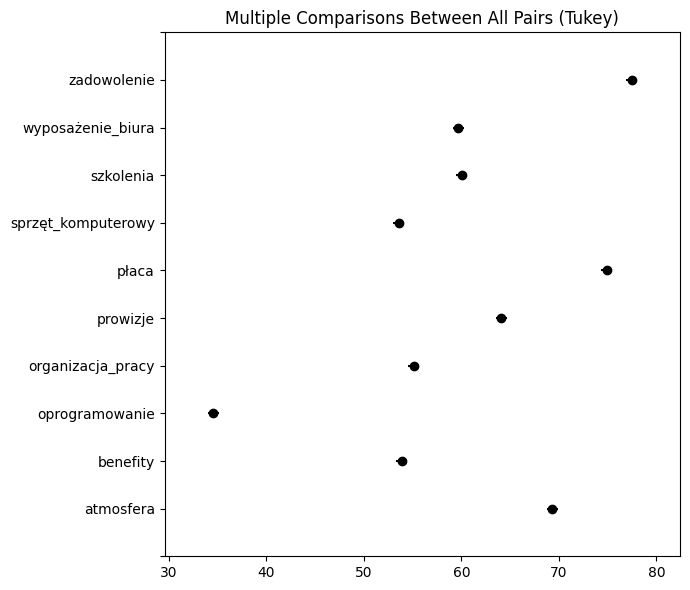

In [58]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
tukey.plot_simultaneous(ax=ax,figsize=(7, 6))
ax.vlines(x=0,ymin=-0.5,ymax=4.5, color="red")
fig.tight_layout()

Widać to faktycznie na wykresie, wyposażenie biura ma bardzo zbliżoną średnią do szkoleń, a sprzęt do benefitów.

### Moc efektu

moc efektu można odczytać bezpośrednio z testu Welcha, np2 ~= 0.7. Natomiast można także ją policzyć:

In [59]:
assumption = pd.DataFrame({'means':[np.mean(df[i]) for i in lista_nazw_kolumn], 'variances': [np.var(df[i]) for i in lista_nazw_kolumn], 'n': [len(df)]*len(lista_nazw_kolumn)})
assumption

,means,variances,n
0,53.590000,54.859678,900
1,34.538889,67.252932,900
2,59.702222,85.753551,900
3,55.118889,48.302532,900
4,69.322222,48.745062,900
5,60.033333,49.356667,900
6,53.870000,51.453100,900
7,64.112222,73.232962,900
8,74.907778,62.137051,900
9,77.455556,28.185802,900


In [60]:
effect = effectsize_oneway(means = assumption.means,
                  vars_ = assumption.variances,
                  nobs = assumption.n,
                  use_var = 'unequal')

print('wielkość efektu: ',effect)

power = FTestAnovaPower().power(effect_size = effect, nobs = len(df), alpha=0.05, k_groups=len(lista_nazw_kolumn))
print('moc testu: ', power)

wielkość efektu:  2.722408583915243
moc testu:  1.0


Wielkość efektu wyszła na poziomie 2.72, co oznacza że efekt jest bardzo silny (więcej niż 0.35)

# Anova dla innych danych

In [61]:
df

,ID,liczba sprzedanych produktów 2020,liczba sprzedanych produktów 2021,liczba sprzedanych produktów 2022,średnia prowizja 2020,średnia prowizja 2021,średnia prowizja 2022,kraj,płeć,sprzęt_komputerowy,oprogramowanie,wyposażenie_biura,organizacja_pracy,atmosfera,szkolenia,benefity,prowizje,płaca,zadowolenie
0,1,309,250,376,490,529,487,Francja,K,57.0,33.0,65.0,50.0,71.0,58.0,57.0,69.0,75.0,80
1,2,307,299,345,430,451,420,Niemcy,M,60.0,47.0,65.0,59.0,70.0,65.0,60.0,73.0,83.0,80
2,3,248,294,345,487,523,535,Niemcy,M,64.0,44.0,71.0,59.0,58.0,58.0,49.0,58.0,72.0,73
3,4,332,297,354,498,417,472,Francja,M,49.0,33.0,58.0,61.0,75.0,65.0,45.0,56.0,69.0,78
4,5,281,249,360,446,499,474,Francja,K,62.0,49.0,61.0,53.0,65.0,49.0,46.0,59.0,62.0,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,267,358,350,487,388,567,Francja,M,42.0,21.0,41.0,60.0,66.0,65.0,48.0,61.0,80.0,75
896,897,263,311,358,450,547,540,Niemcy,M,52.0,21.0,52.0,70.0,75.0,72.0,51.0,67.0,73.0,79
897,898,243,296,337,445,367,519,Francja,K,53.0,31.0,59.0,55.0,71.0,63.0,57.0,70.0,83.0,75
898,899,304,336,321,464,508,508,Hiszpania,M,45.0,27.0,47.0,46.0,78.0,51.0,46.0,54.0,65.0,72


In [62]:
lista_nazw_kolumn = ["średnia prowizja 2020", "średnia prowizja 2021", "średnia prowizja 2022", "liczba sprzedanych produktów 2020", "liczba sprzedanych produktów 2021", "liczba sprzedanych produktów 2022"]

In [63]:
df1 = pd.melt(df, value_vars=lista_nazw_kolumn)
df1 = df1.rename(columns={"variable": "group", "value": "score"})
df1.groupby('group')['score'].agg(['mean',  'median', 'std',  'skew', 'count']).round(2)

,mean,median,std,skew,count
group,,,,,
liczba sprzedanych produktów 2020,294.53,295.0,29.91,-0.00,900
liczba sprzedanych produktów 2021,299.43,299.0,25.59,0.11,900
liczba sprzedanych produktów 2022,341.87,342.0,15.41,-0.06,900
średnia prowizja 2020,457.54,456.5,54.60,0.04,900
średnia prowizja 2021,460.19,459.0,56.21,0.08,900
średnia prowizja 2022,498.87,499.0,55.06,-0.08,900


## Normalność rozkładów

In [64]:
pg.normality(df1, group = 'group', dv = 'score')

,W,pval,normal
group,,,
średnia prowizja 2020,0.998694,0.762744,True
średnia prowizja 2021,0.999168,0.966141,True
średnia prowizja 2022,0.998756,0.798326,True
liczba sprzedanych produktów 2020,0.996959,0.085515,True
liczba sprzedanych produktów 2021,0.997769,0.272334,True
liczba sprzedanych produktów 2022,0.997754,0.266946,True


Jak widać, nigdzie nie można odrzucić hipotezy zerowej (H0: rozkład jest normalny). Więc zakładamy że można ją przjąć - rozkłady są normalne.

## Jednorodność wariancji

In [65]:
pg.homoscedasticity(df1, group='group', dv='score', method = 'bartlett')

,T,pval,equal_var
bartlett,2008.4312,0.0,False


p wynosi 0, więc odrzucamy hipotezę zerową (H0: wariancje są sobie równe). Dlatego przyjmujemy hipotezę H1 - istnieję wariancje różne od siebie.

Rozkłądy są normalne i wariancje dla co najmniej jednej próby są różne. Dlatego należy przeprowadzić test Welcha.

## Test Welcha

In [66]:
pg.welch_anova(dv='score', between='group', data=df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,group,5,2409.942735,4008.205899,0.0,0.78906


Ponieważ p wynosi 0, wiadomo że któraś ze średnich różni się od pozostałych.

## Analiza post-hoc
### Test tukeya

In [67]:
tukey = pairwise_tukeyhsd(endog=df1['score'],  groups=df1['group'], alpha=0.05)
print(tukey)

                            Multiple Comparison of Means - Tukey HSD, FWER=0.05                             
              group1                            group2              meandiff p-adj   lower    upper   reject
------------------------------------------------------------------------------------------------------------
liczba sprzedanych produktów 2020 liczba sprzedanych produktów 2021   4.9022  0.145  -0.8412  10.6456  False
liczba sprzedanych produktów 2020 liczba sprzedanych produktów 2022  47.3411    0.0  41.5977  53.0845   True
liczba sprzedanych produktów 2020             średnia prowizja 2020 163.0156    0.0 157.2722  168.759   True
liczba sprzedanych produktów 2020             średnia prowizja 2021 165.6656    0.0 159.9222  171.409   True
liczba sprzedanych produktów 2020             średnia prowizja 2022 204.3411    0.0 198.5977 210.0845   True
liczba sprzedanych produktów 2021 liczba sprzedanych produktów 2022  42.4389    0.0  36.6955  48.1823   True
liczba sprzedanych 

Dla:
* liczby sprzedanych produktów 2020 i 2021
* śedniej prowizji 2020 i 2021

hipoteza zerowa (H0: średnie mają taki sam rozkład) nie została odrzucona. Świadczy to o tym że średnie tych kolumn są do siebie bardzo zbliżone.

# Anova - regresja

In [68]:
lista_nazw_kolumn = ["średnia prowizja 2020", "średnia prowizja 2021", "średnia prowizja 2022"]

In [69]:
df1 = pd.melt(df.reset_index(), id_vars=['index'], value_vars=lista_nazw_kolumn)
df1.columns = ['index', 'treatments', 'value']
df1


,index,treatments,value
0,0,średnia prowizja 2020,490
1,1,średnia prowizja 2020,430
2,2,średnia prowizja 2020,487
3,3,średnia prowizja 2020,498
4,4,średnia prowizja 2020,446
...,...,...,...
2695,895,średnia prowizja 2022,567
2696,896,średnia prowizja 2022,540
2697,897,średnia prowizja 2022,519
2698,898,średnia prowizja 2022,508


In [70]:
model = ols('value ~ C(treatments)', data=df1).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(treatments),9.631868e+05,2.0,157.509542,2.010583e-65
Residual,8.246214e+06,2697.0,NaN,NaN


anova_lm pokazuje, że Prob (F-statistic), czyli wartość p, jest mniejsza od 0.05. Świadczy to że model jest istotny statystycznie?

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     157.5
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           2.01e-65
Time:                        11:36:50   Log-Likelihood:                -14664.
No. Observations:                2700   AIC:                         2.933e+04
Df Residuals:                    2697   BIC:                         2.935e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                457.5444      1.843    248.238      0.000     453.930     461.159
C(treatments)[T.średnia prowizja 2021]     2.6500      2.607      1.017      0.309      -2.461       7.761
C(treatments)[T.średnia prowizja 2022]    41.3256      2.607     15.854      0.000      36.214      46.437
==============================================================================
Omnibus:                        0.115   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.944   Jarque-Bera (JB):                0.102
Skew:                           0.015   Prob(JB):                        0.950
Kurtosis:                       3.005   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R squared na poziomie 10% oznacza, że C(treatments) wyjażnie 10% zmian wartości value.

In [72]:
df[lista_nazw_kolumn].mean()

średnia prowizja 2020    457.544444
średnia prowizja 2021    460.194444
średnia prowizja 2022    498.870000
dtype: float64

coef (średnia?) równy 457 odpowiada średniaj prowizji 2020. Natomiast widać, że coef dla 2021 i 2022 zwiększył się kolejno o 2.65 i 41.32.

coef pokazuje, jaki wpływ ma dana zmienna na oryginalną zmienną.

Natomiast wzrost wartości w 2021 nie jest istotny statystycznie, a wzrost do 2022 już jest (p value wynosi kolejno 0.3 i 0.0, czyli 30% i 0% szans że zmienna NIE ma wpływu na zmienną zależna)

# Anova dwuczynnikowa

## Pojedynczy dwuwymiarowy rozkład normalny

**H0 :** Zmienne mają wielowymiarowy rozkład normalny.

**H1:**  Zmienne nie mają wielowymiarowego rozkładu normalnego.

In [73]:
pn.multivariate_normality(df[['średnia prowizja 2020', 'liczba sprzedanych produktów 2020']], alpha=.05)

HZResults(hz=688.6316978829278, pval=8.217231758684475e-142, normal=False)

p val jest zbliżone do zera, więc H0 odrzucamy. Przyjmujemy H1, zmienne nie mają rozkładu normalnego.

Powtarzamy, tyle że testem shapiro wilka

In [74]:
test.mvshapiro(df[['średnia prowizja 2020', 'liczba sprzedanych produktów 2020']])

{'statistic': 0.99789762,
 'p_value': 0.30797557,
 'Method': 'Generalized Shapiro-Wilk test for Multivariate Normality'}

Tutaj p-value wyszło powyżej zakładanego poziomu 0.05, więc H0 nie można odrzucić. Co jest sprzeczne z poprzednim wynikiem.

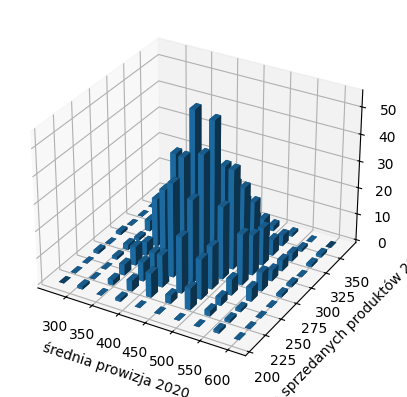

In [75]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = df['średnia prowizja 2020']
y = df['liczba sprzedanych produktów 2020']
hist, xedges, yedges = np.histogram2d(x, y, bins = 10)

xpos, ypos = np.meshgrid(xedges[:-1], yedges[:-1], indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# 0.05 - rozmiar słupków
dx = dy = 10 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('średnia prowizja 2020')
ax.set_ylabel('liczba sprzedanych produktów 2020')

plt.show()

Faktycznie, nie wygląda to jak wielowymiarowy rozkład normalny

## Anova wieloczynnikowa

**HOA:** płaca nie wpływa na satysfakcję z pracy.

**HOB:** atmosfera nie wpływa na satysfakcję z pracy.

**H0AB:** płaca i atmosfera nie wpływają na satysfakcję z pracy.

In [77]:
kolumny = ['sprzęt_komputerowy',
 'oprogramowanie',
 'wyposażenie_biura',
 'organizacja_pracy',
 'atmosfera',
 'szkolenia',
 'benefity',
 'prowizje',
 'płaca',
 'zadowolenie']

aov = pg.anova(df[kolumny], dv='zadowolenie', between=['płaca', 'atmosfera'], detailed=True)
aov

c:\Users\kubam\Documents\statystyka_wielowymiarowa\.venv\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 44, but rank is 5
  warnings.warn('covariance of constraints does not have full '
c:\Users\kubam\Documents\statystyka_wielowymiarowa\.venv\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 39, but rank is 5
  warnings.warn('covariance of constraints does not have full '
c:\Users\kubam\Documents\statystyka_wielowymiarowa\.venv\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 1716, but rank is 551
  warnings.warn('covariance of constraints does not have full '


,Source,SS,DF,MS,F,p-unc,np2
0,płaca,9.242417e+03,44.0,210.054935,8.196206,2.472703e-07,0.508197
1,atmosfera,1.428838e+04,39.0,366.368709,14.295468,9.711630e-13,0.615013
2,płaca * atmosfera,1.686678e+07,1716.0,9829.128157,383.526160,0.000000e+00,0.999470
3,Residual,8.944281e+03,349.0,25.628312,NaN,NaN,NaN



Po pierwsze, widać że P jest zlbiżone do zera we wszystkich 3 przypadkach, co świadczy o tym że wyniki są istotne statystyczne - hipotezę zerową można odrzucić. Czyli zarówno płaca jak i atmosfera mają istotny wpyw na zadowolonie.

Widać także, że np2 > 0.14, co oznacza że efekt jest silny.

In [82]:

#fig = interaction_plot(df.płaca, df.atmosfera, df.zadowolenie)


Natomiast interaction_plot nie ma w tym przypadku sensu, ponieważ ani płaca ani atmosfera nie są danymi "zkateogoryzowanymi" do pewnej małej liczby kategorii.

## Anova wieloczynnikowa dla innych danych

In [85]:
model = ols('zadowolenie ~ C(kraj) + C(płeć) + C(kraj):C(płeć)', data=df).fit()

anova_table = sms.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(kraj),3710.842222,2.0,76.727700,1.767195e-31
C(płeć),37.617778,1.0,1.555618,2.126347e-01
C(kraj):C(płeć),0.148889,2.0,0.003079,9.969262e-01
Residual,21618.613333,894.0,NaN,NaN


In [86]:
pw = model.t_test_pairwise('C(kraj)')
pw.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Hiszpania-Francja,4.646667,0.567825,8.183272,9.456427e-16,3.532241,5.761092,2.836928e-15,True
Niemcy-Francja,0.753333,0.567825,1.326700,1.849468e-01,-0.361092,1.867759,1.849468e-01,False
Niemcy-Hiszpania,-3.893333,0.567825,-6.856572,1.314558e-11,-5.007759,-2.778908,2.629116e-11,True


c:\Users\kubam\Documents\statystyka_wielowymiarowa\.venv\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000002FA7F756D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


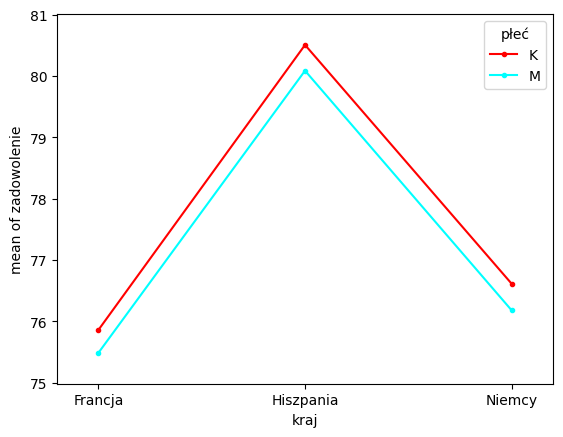

In [87]:
fig = interaction_plot(df.kraj, df.płeć, df.zadowolenie)

c:\Users\kubam\Documents\statystyka_wielowymiarowa\.venv\Lib\site-packages\statsmodels\graphics\factorplots.py:113: FutureWarning: The provided callable <function mean at 0x000002FA7F756D40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  plot_data = data.groupby(['trace', 'x']).aggregate(func).reset_index()


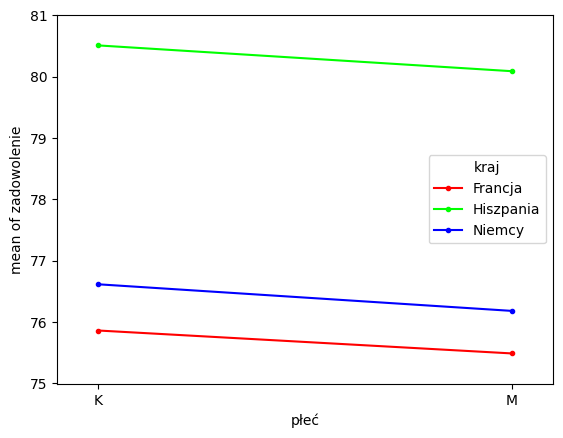

In [88]:
fig = interaction_plot(df.płeć, df.kraj, df.zadowolenie)